In [16]:
# Connecting to GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import feature
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import metrics
import os
import gzip
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_excel('/content/gdrive/My Drive/Capstone/dataset.xlsx')

# Check for missing values
print(df.isnull().sum())

# Remove non-numeric characters and convert columns to numeric
for column in df.columns:
    # Assuming your data is in string format with a '$' sign
    if df[column].dtype == 'object':
        df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)
        # Round to the nearest whole number and convert to integer
        df[column] = df[column].round(0).astype(int)

# Fill missing values

# Option 2: Fill with the mean of the column
df_filled = df.fillna(df.mean())



# Save the filled dataframe if needed
df_filled.to_excel('/content/gdrive/My Drive/Capstone/datasetprocessed.xlsx')

print(df_filled.head())  # Show the first few rows of the filled dataframe


                                                  Year  Average Copper Price  \
Year                                          1.000000              0.040161   
Average Copper Price                          0.040161              1.000000   
Wages and salaries                            0.793989              0.538121   
Employer contributions into superannuation    0.814199              0.486114   
Selected labour costs                         0.805138              0.515456   
Payroll tax                                   0.639832              0.226732   
Total labour costs                            0.804994              0.513524   
Sales and service income                      0.677775              0.661223   
Capital work done for own use                 0.868985              0.222014   
Purchases of goods and materials              0.398001              0.517346   
Other intermediate input expenses             0.035830              0.316872   
Industry value added                    

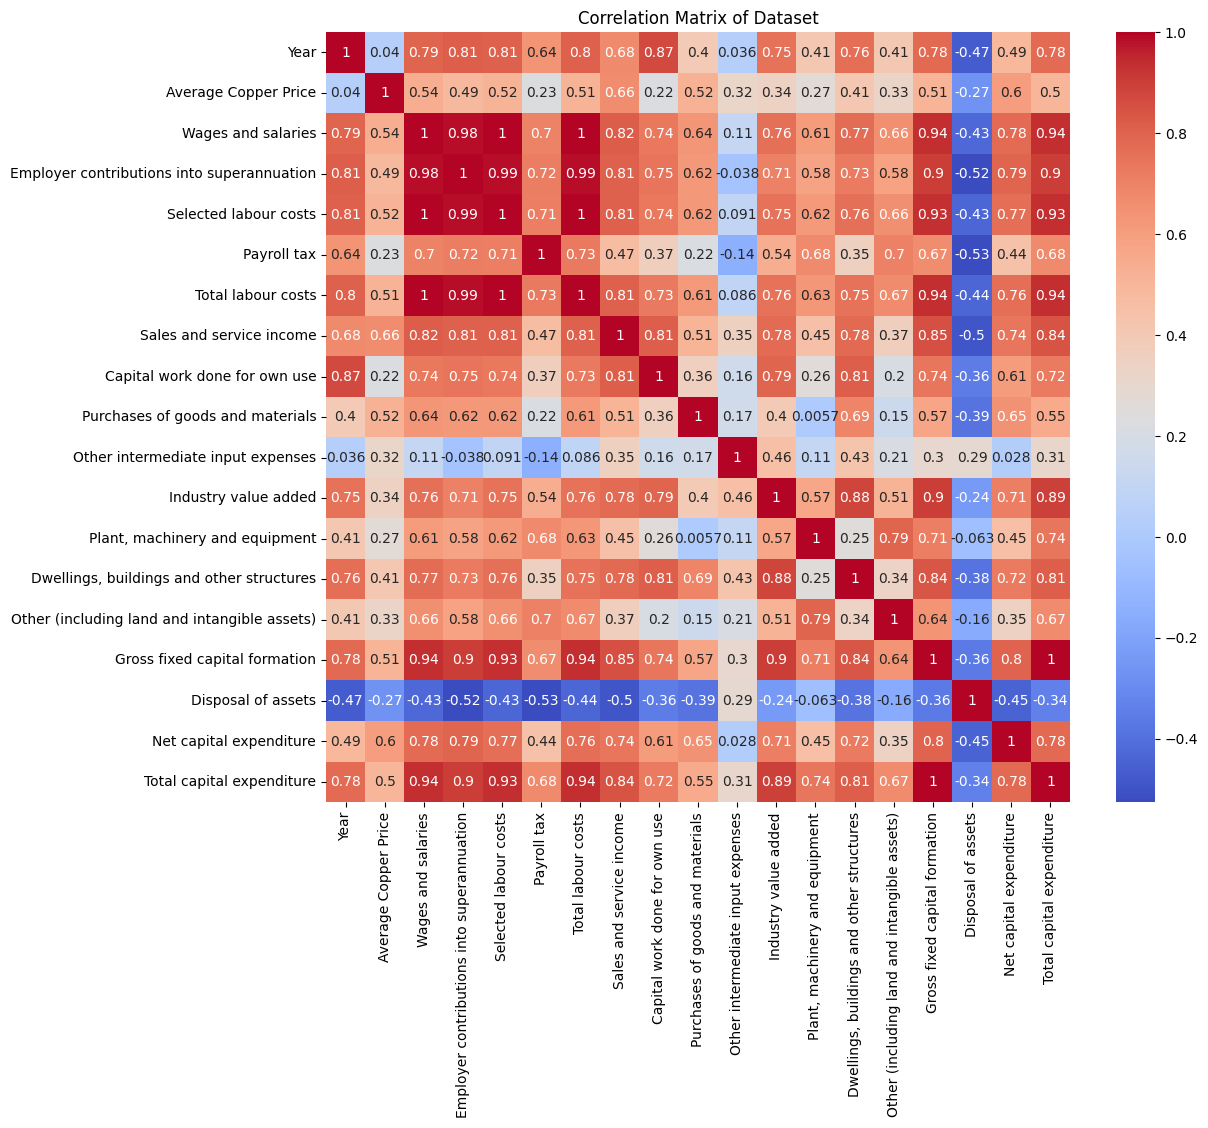

In [25]:
# Assuming df_processed is your dataframe
correlation_matrix = df_filled.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix between variables that are processed
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Dataset')
plt.show()
